In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
# from datasets.mnist import DataModule, DataModuleConfig


# dm = DataModule(DataModuleConfig(root="./data/mnistpointcloud"))
# test_ds = dm.test_ds
# idxs = torch.load("./results/idxs.pt")




ECT_PLOT_CONFIG = {"cmap":"bone","vmin":-0.5,"vmax":1.5}
PC_PLOT_CONFIG = {"s":10,"c":'.5'}





(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)
(128, 2)


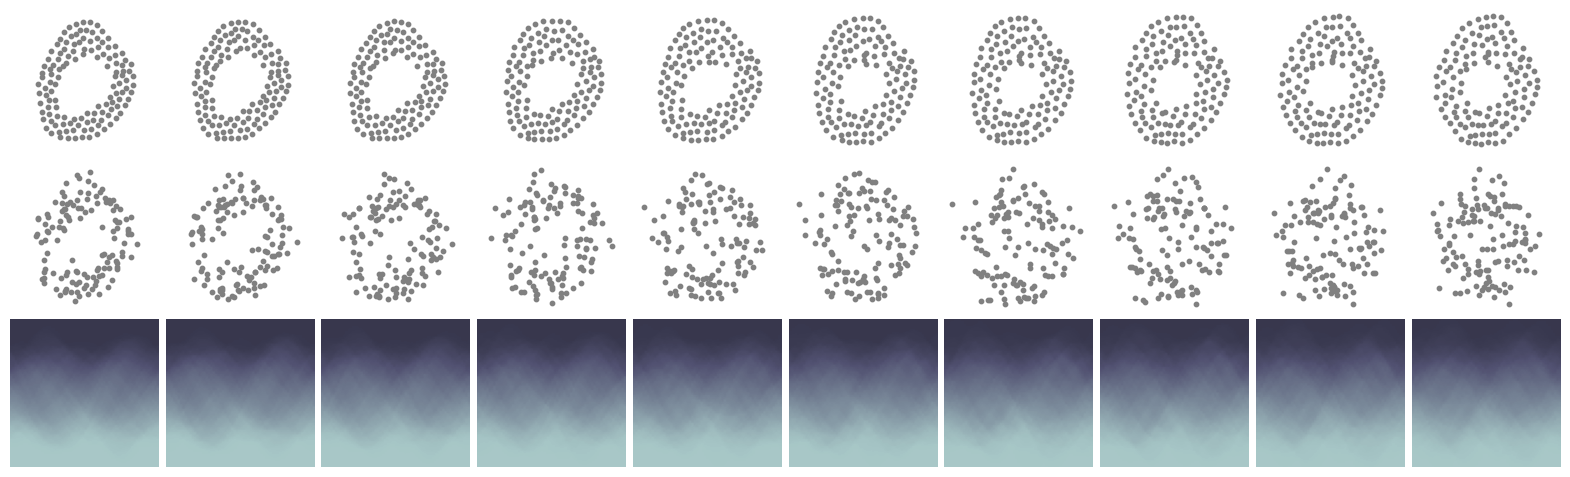

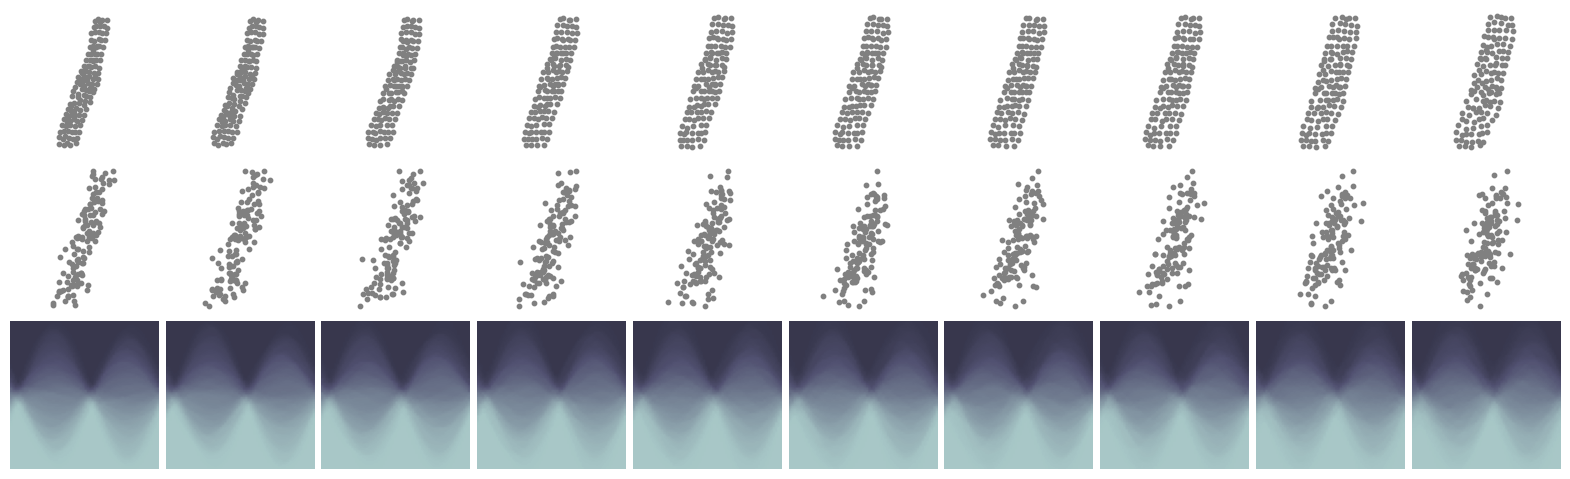

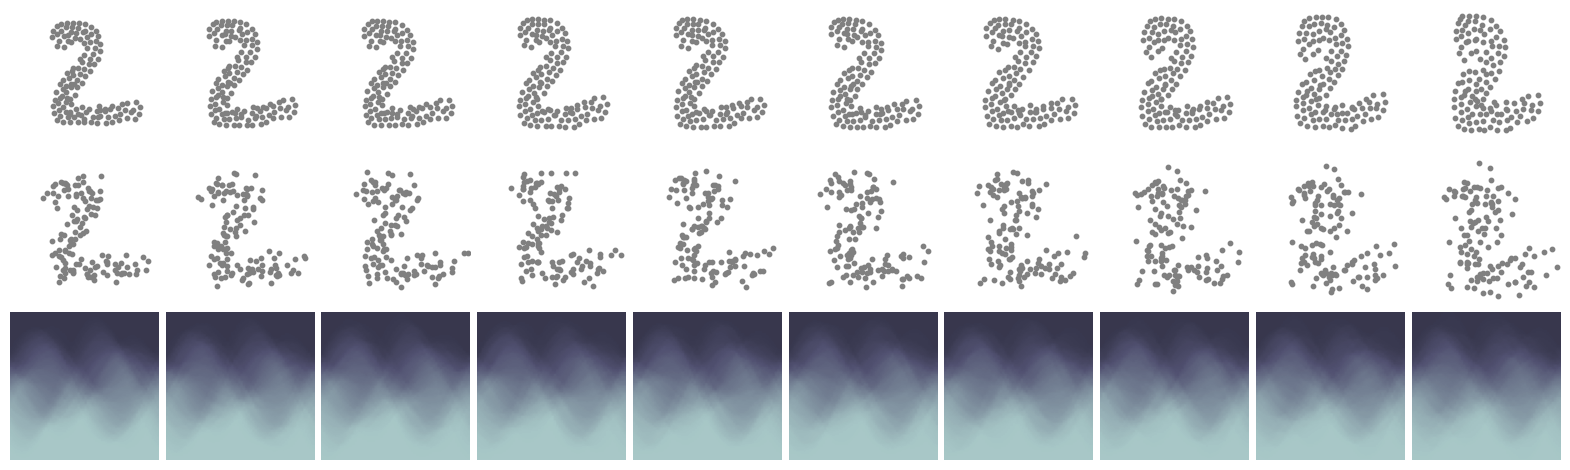

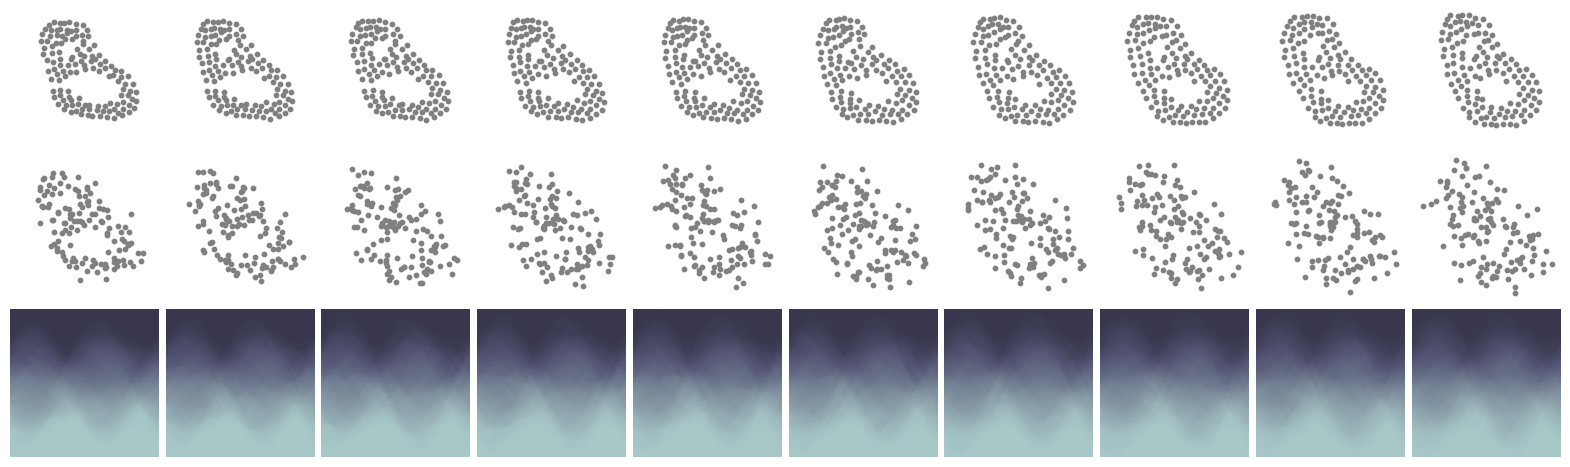

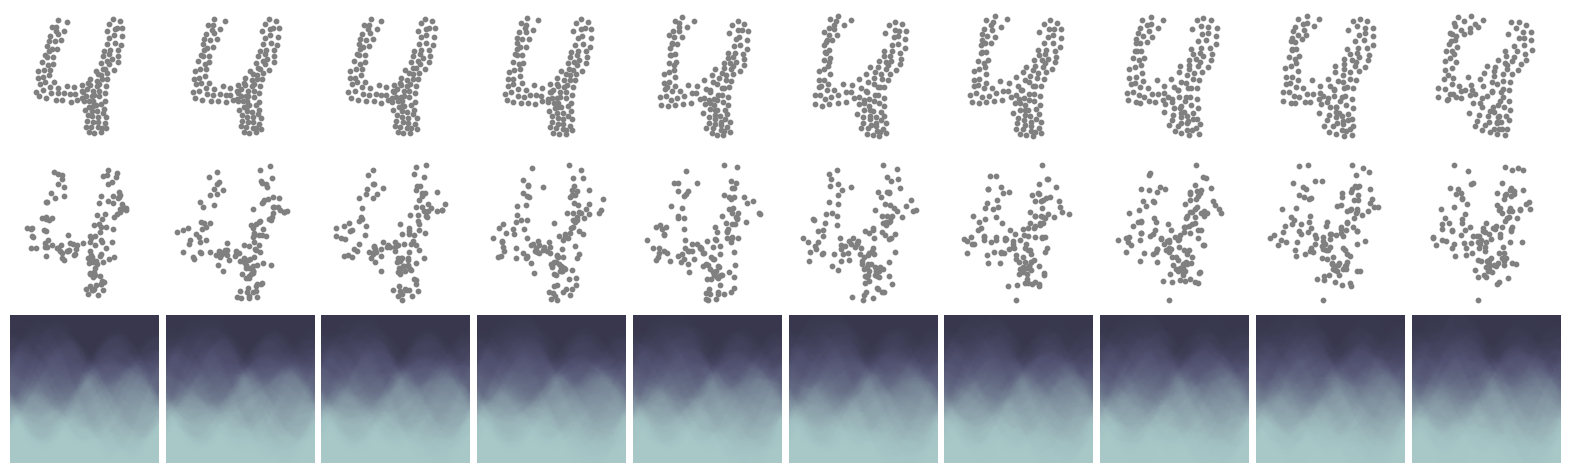

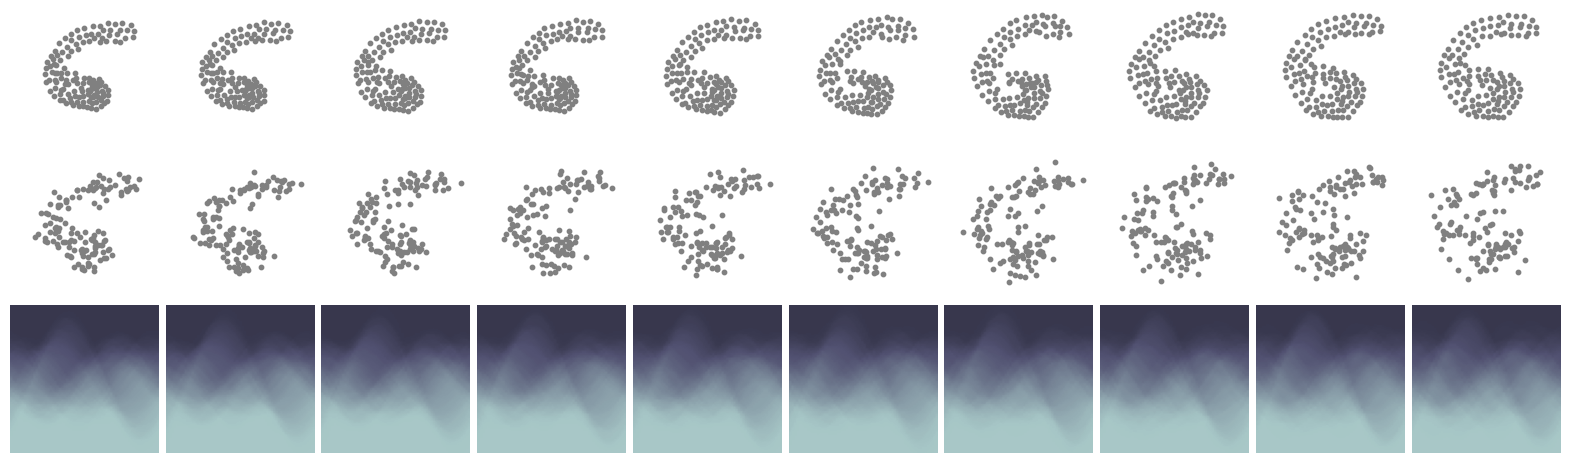

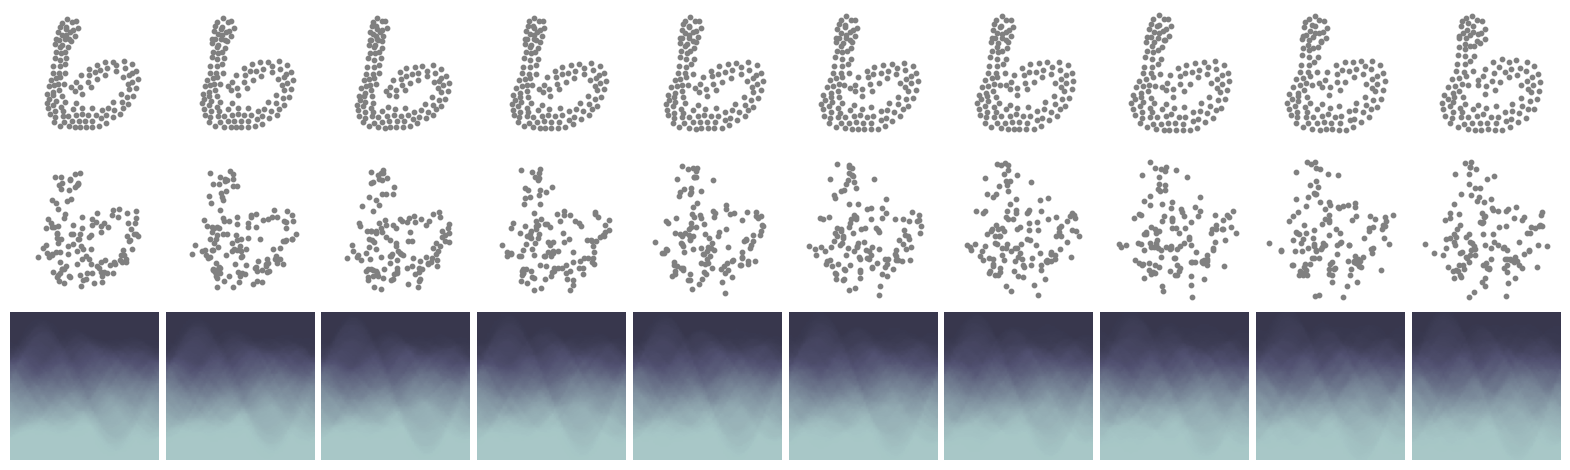

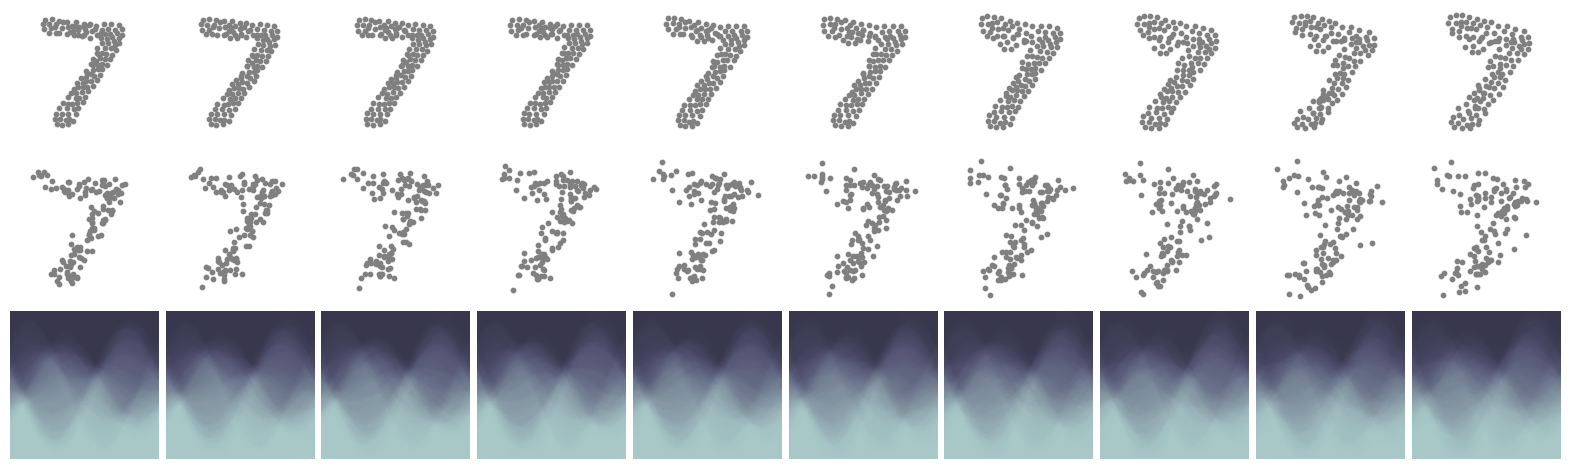

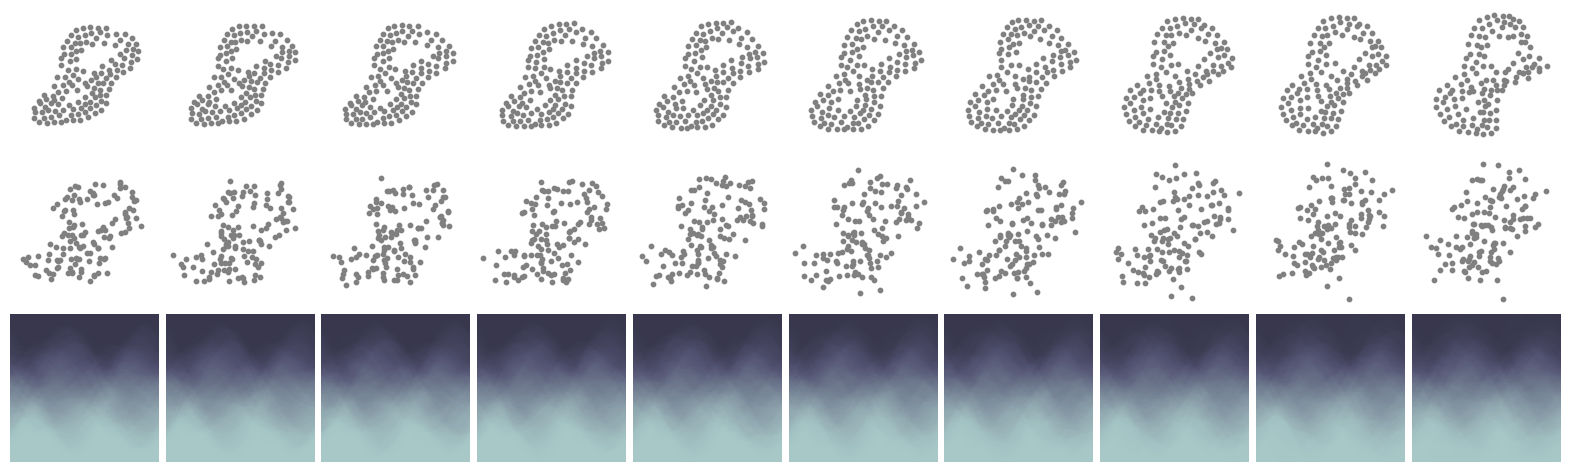

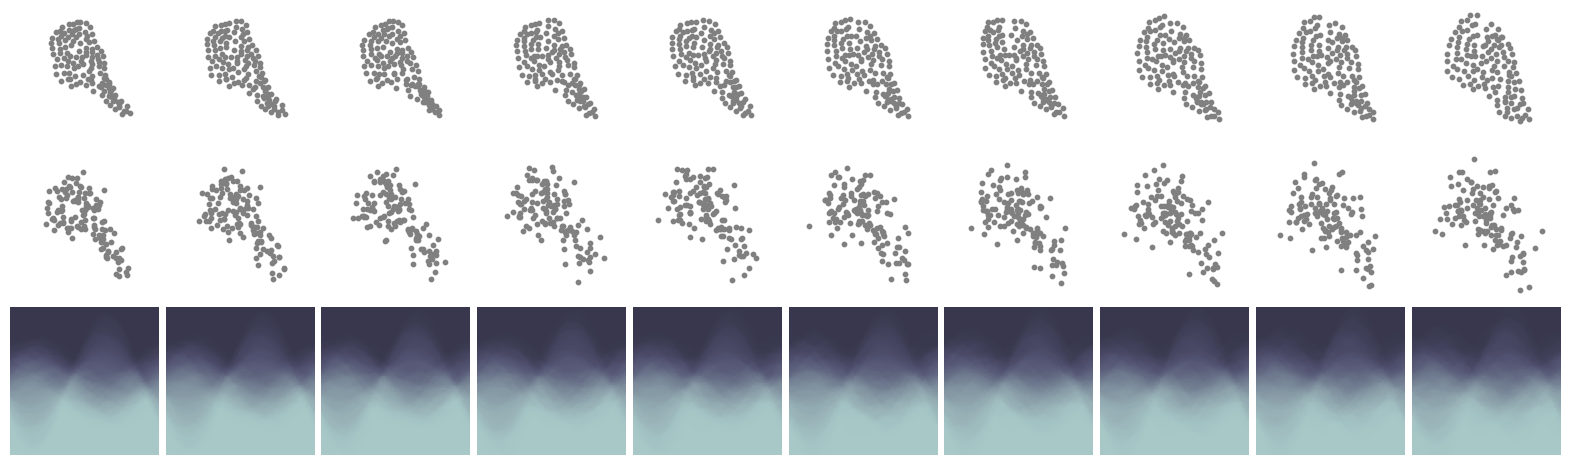

In [7]:
NOISE_TYPE = "ambient"
DATASET_NAME = "mnist"
vis_ect = torch.load(f"./results/noise_{NOISE_TYPE}_vis_ect.pt")
vis_x = torch.load(f"./results/noise_{NOISE_TYPE}_vis_x.pt")
vis_x_original = torch.load(f"./results/noise_{NOISE_TYPE}_vis_x_original.pt")

def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


for i in vis_ect.keys():
    fig,axes=plt.subplots(3,10, figsize=(20,6))
    fig.subplots_adjust(wspace=0.05,hspace=0.05)

    for ect,x,x_orig,axis in zip(vis_ect[i],vis_x[i],vis_x_original[i],axes.T):
        x = x.view(128,2).cpu().numpy()
        x = rotate(x, degrees=-90)

        x_orig = x_orig.cpu().numpy()
        x_orig = rotate(x_orig, degrees=-90)

        ax = axis[0]
        ax.scatter(x[:,0],x[:,1],**PC_PLOT_CONFIG)
        ax.set_xlim([-1.1,1.1])
        ax.set_xlim([-1.1,1.1])
        ax.axis("off")
        ax.set_aspect(1)


        ax = axis[1]
        ax.scatter(x_orig[:,0],x_orig[:,1],**PC_PLOT_CONFIG)
        ax.set_xlim([-1.1,1.1])
        ax.set_xlim([-1.1,1.1])
        ax.axis("off")
        ax.set_aspect(1)
        
        ax = axis[2]
        ax.imshow(ect.cpu().squeeze().numpy(),**ECT_PLOT_CONFIG)
        ax.axis("off")
        
    plt.savefig(f"./figures/img/mnist/stability_{NOISE_TYPE}_{i}",
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0)

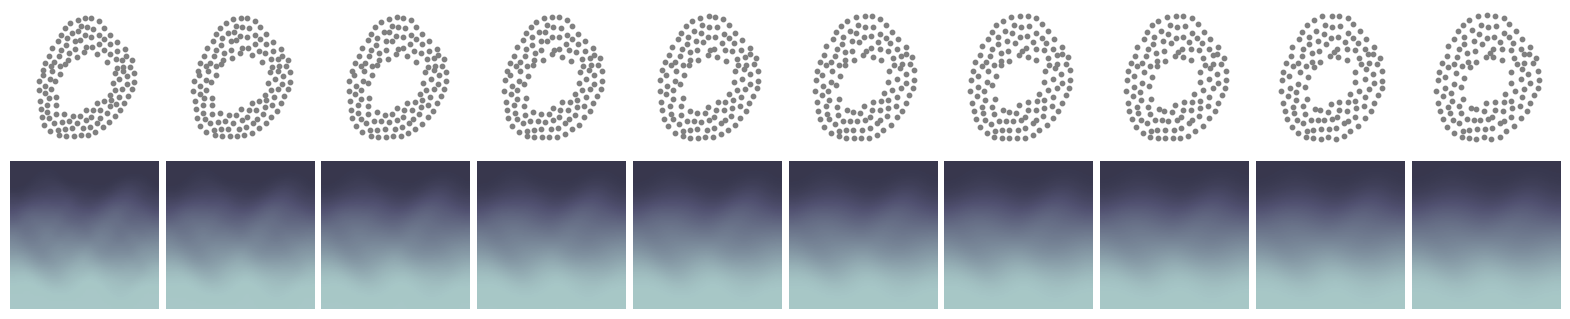

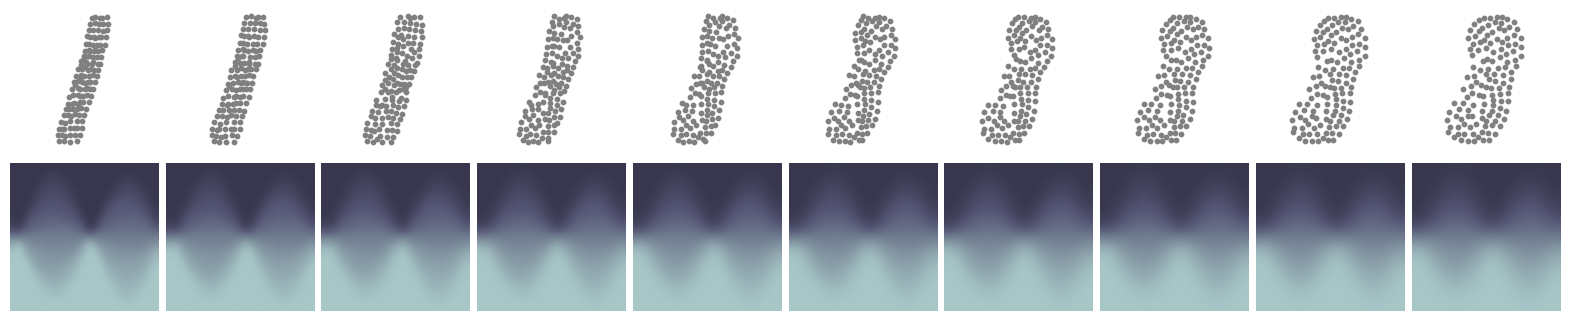

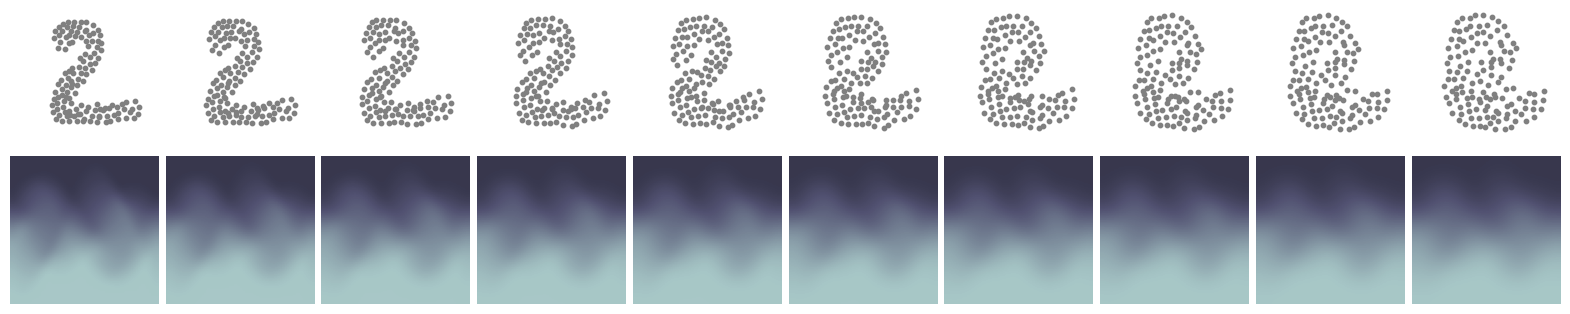

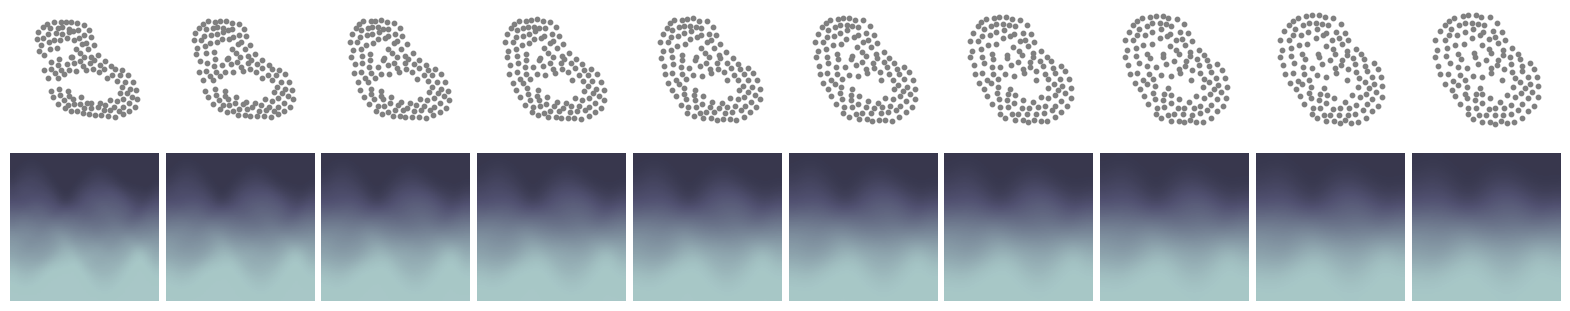

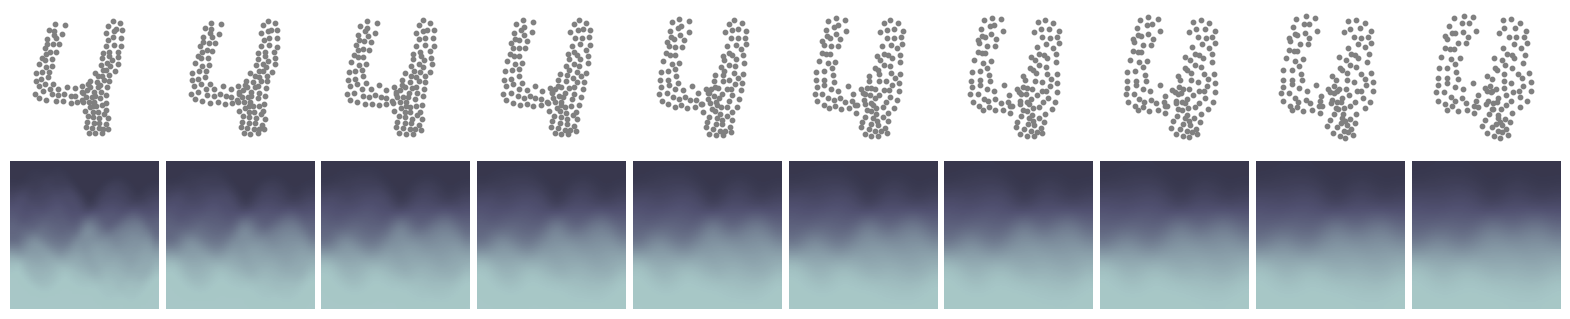

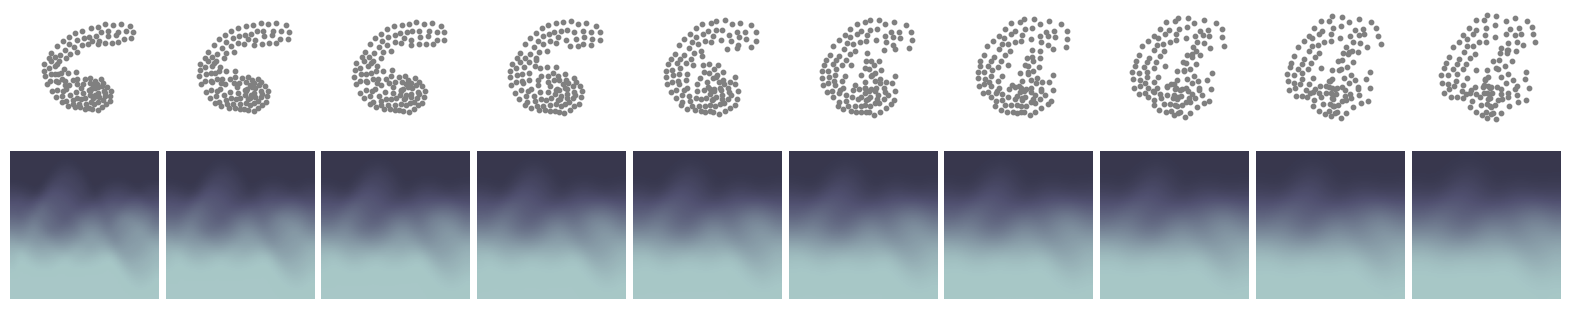

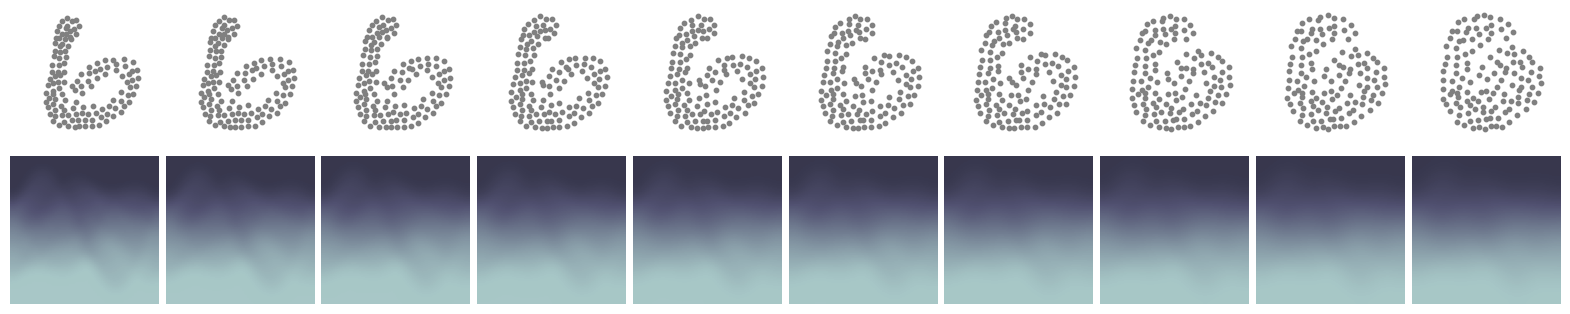

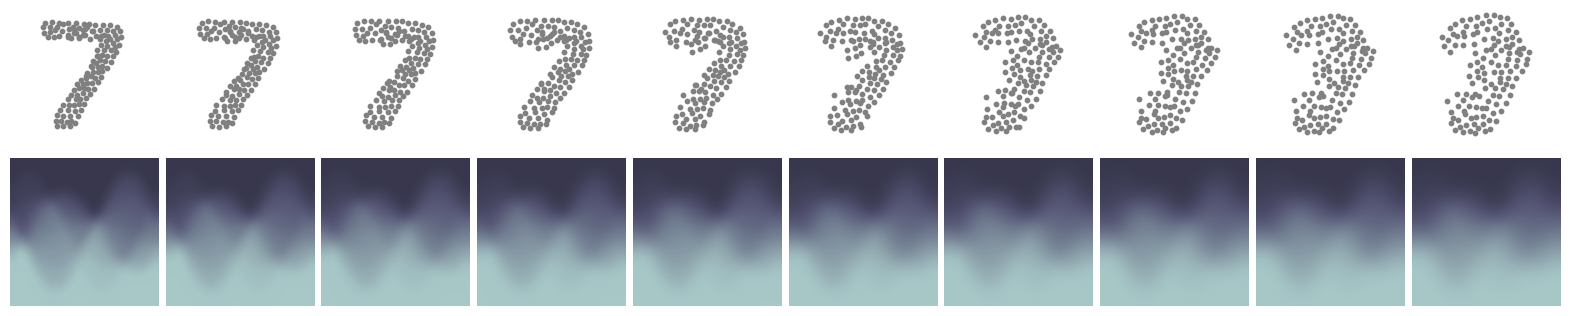

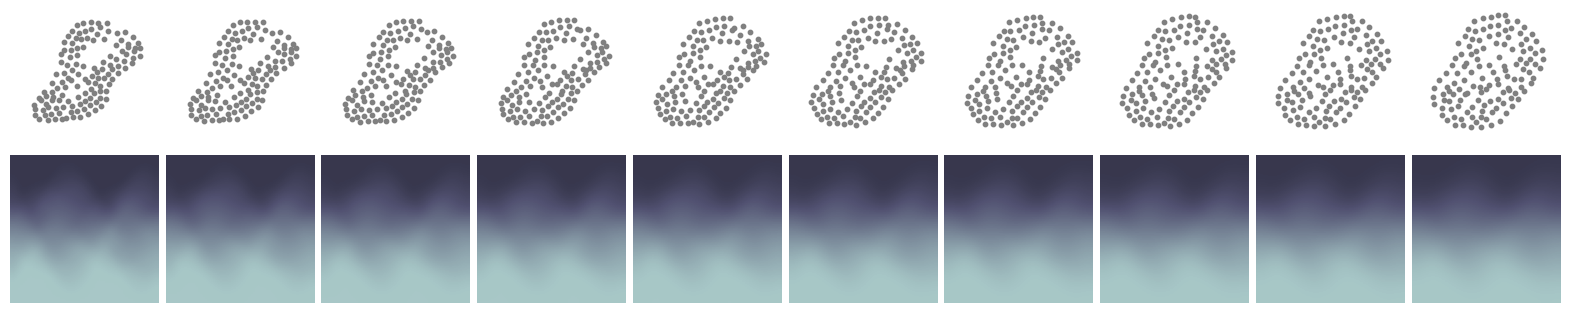

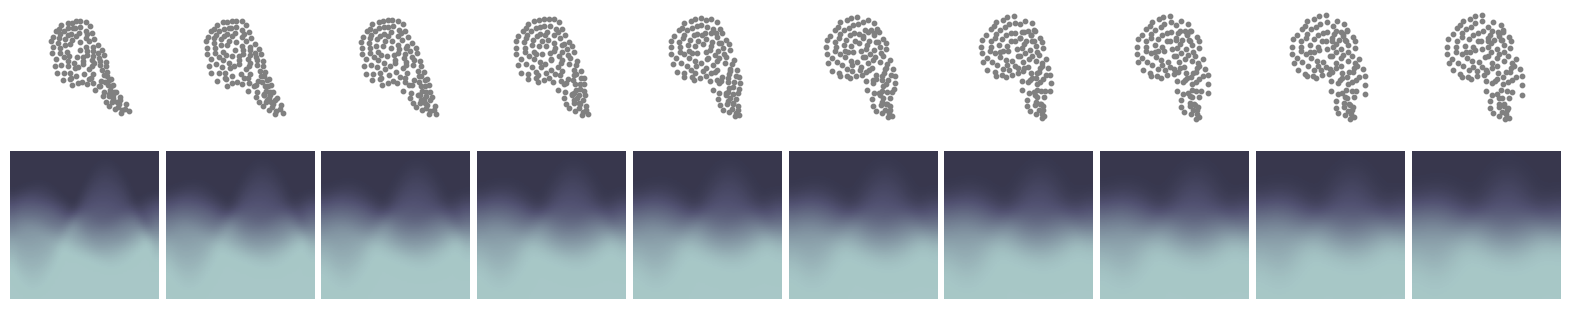

In [8]:
NOISE_TYPE = "blur"
DATASET_NAME = "mnist"
vis_ect = torch.load(f"./results/noise_{NOISE_TYPE}_vis_ect.pt")
vis_x = torch.load(f"./results/noise_{NOISE_TYPE}_vis_x.pt")

def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


for i in vis_ect.keys():
    fig,axes=plt.subplots(2,10, figsize=(20,4))
    fig.subplots_adjust(wspace=0.05,hspace=0.05)

    for ect,x,axis in zip(vis_ect[i],vis_x[i],axes.T):
        x = x.view(128,2).cpu().numpy()
        x = rotate(x, degrees=-90)
        ax = axis[0]
        ax.scatter(x[:,0],x[:,1],**PC_PLOT_CONFIG)
        ax.set_xlim([-1.1,1.1])
        ax.set_xlim([-1.1,1.1])
        ax.axis("off")
        ax.set_aspect(1)
        
        ax = axis[1]
        ax.imshow(ect.squeeze().cpu().numpy(),**ECT_PLOT_CONFIG)
        ax.axis("off")
        
    plt.savefig(f"./figures/img/mnist/stability_{NOISE_TYPE}_{i}",
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0)

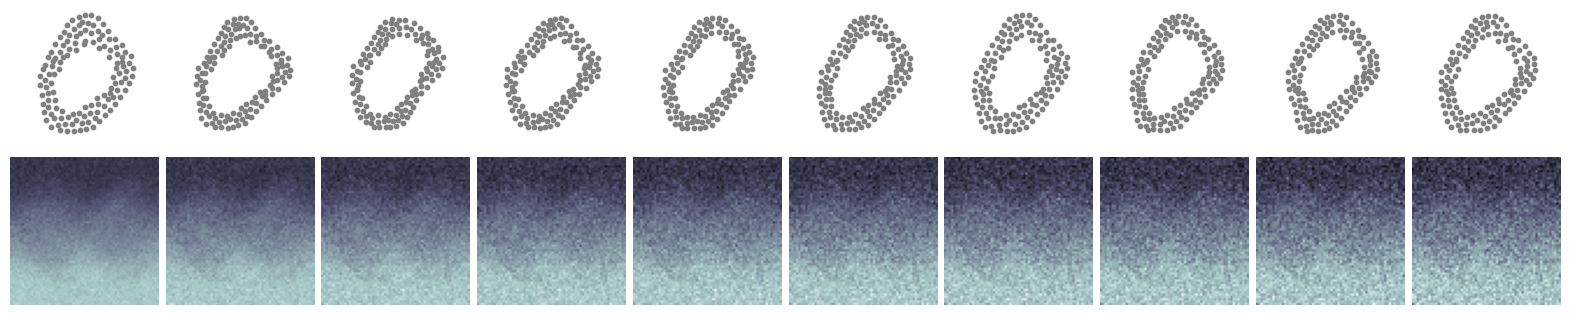

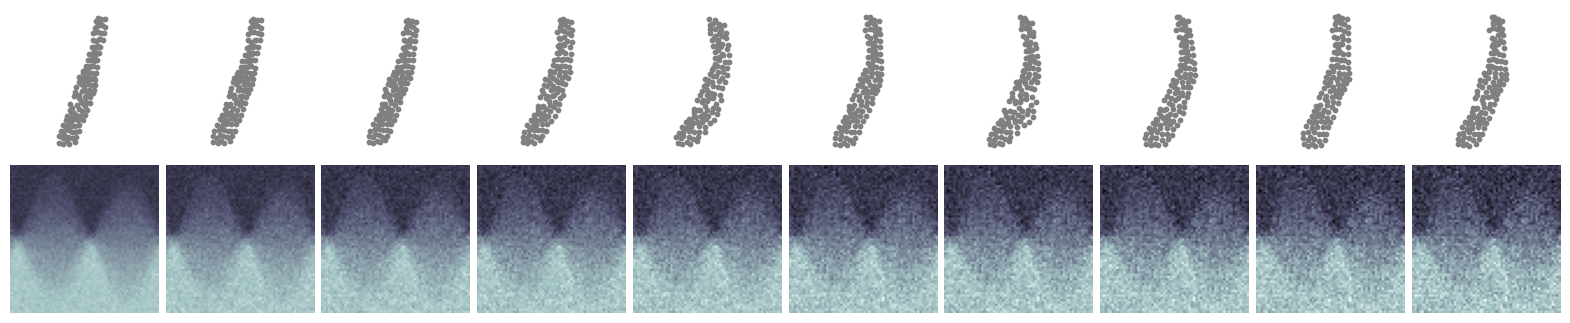

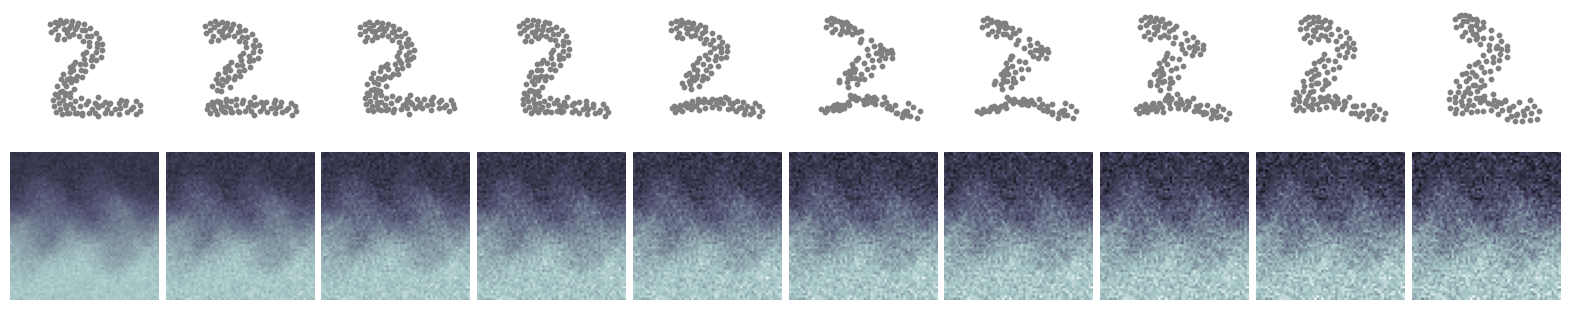

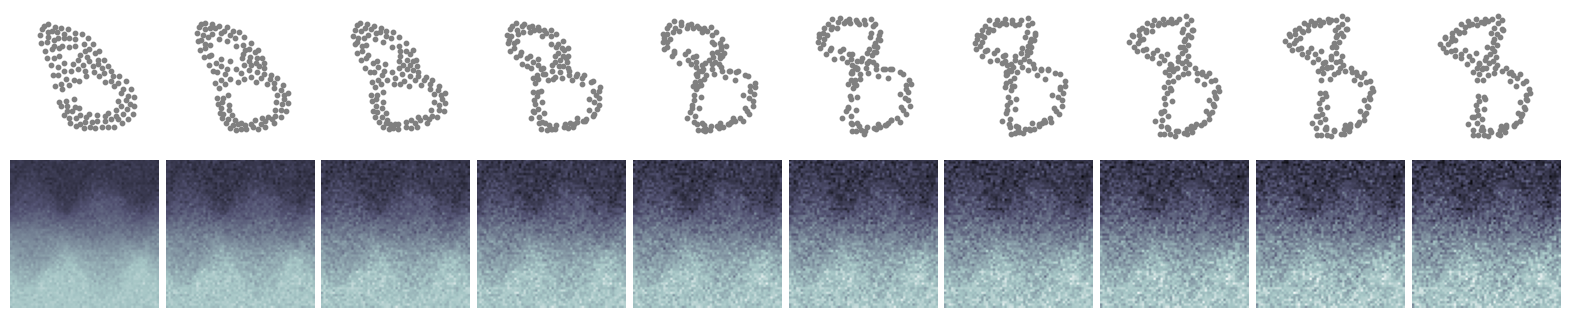

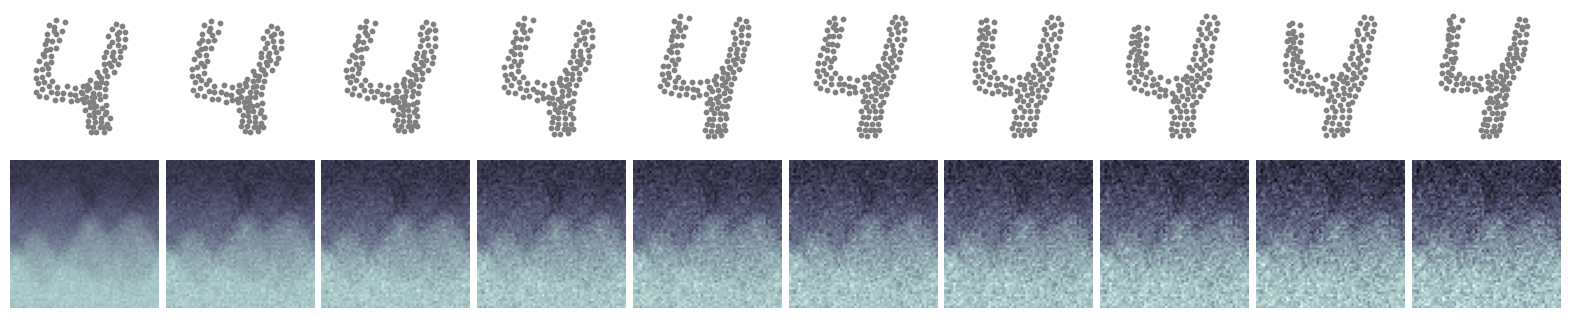

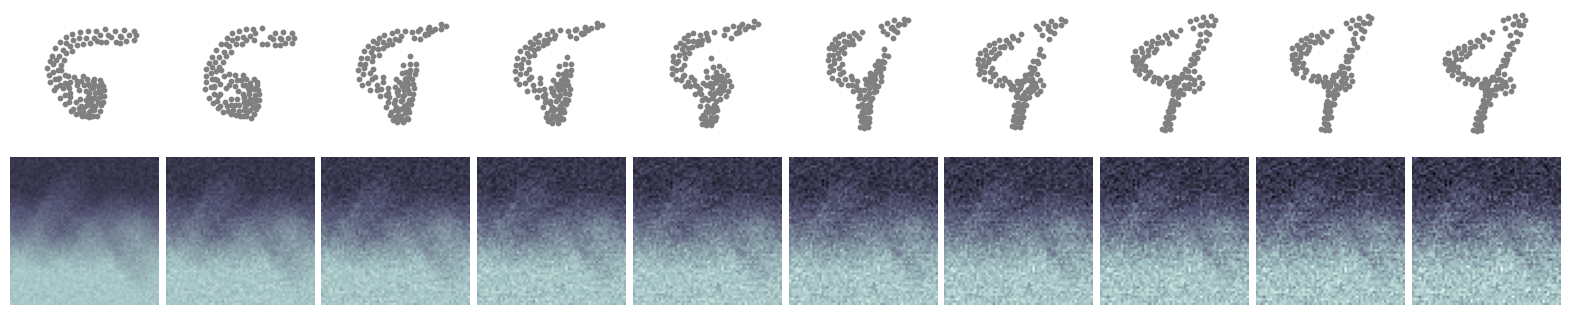

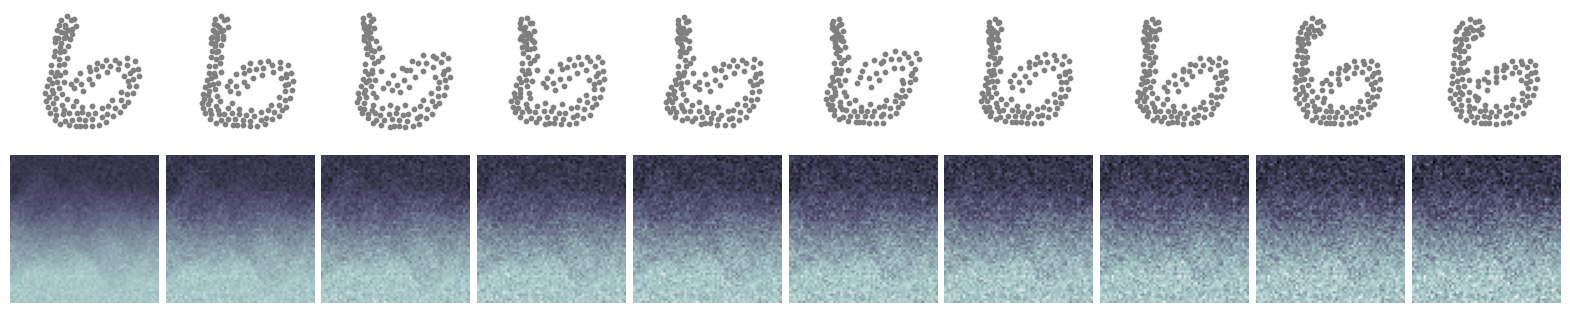

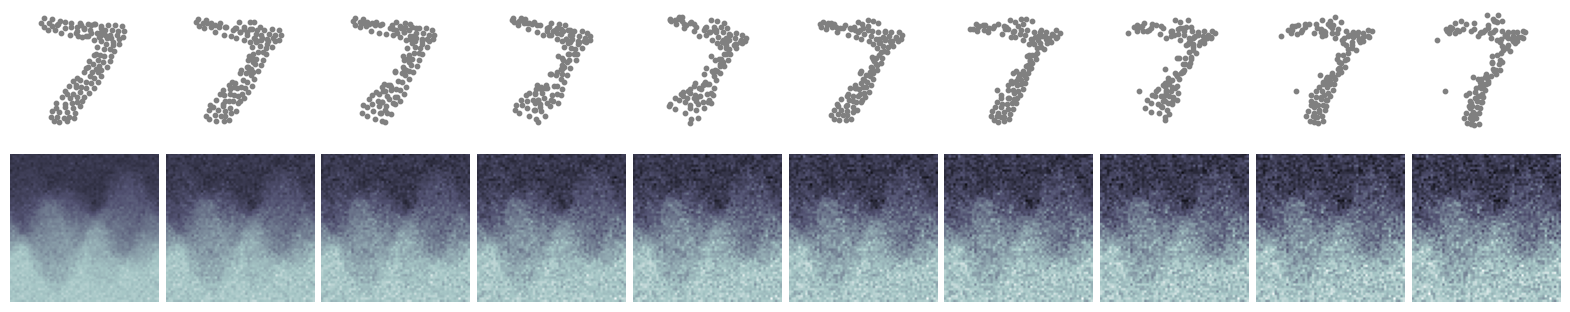

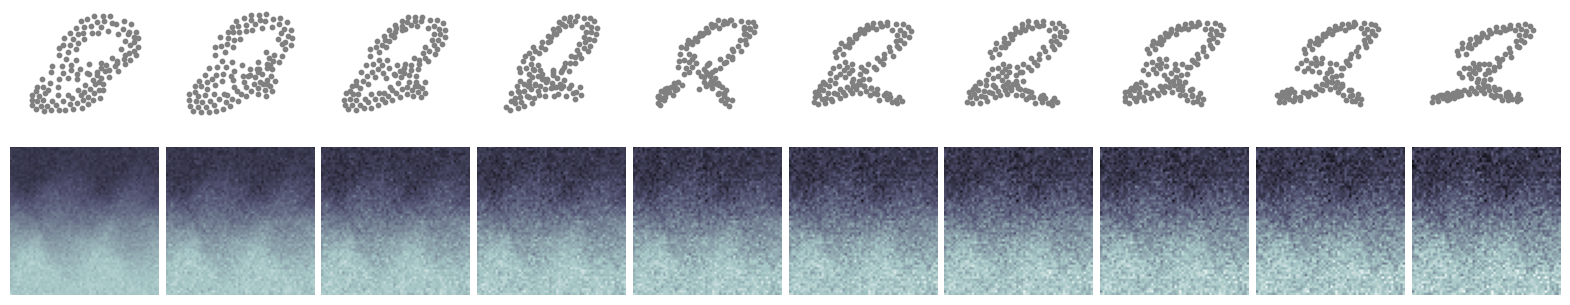

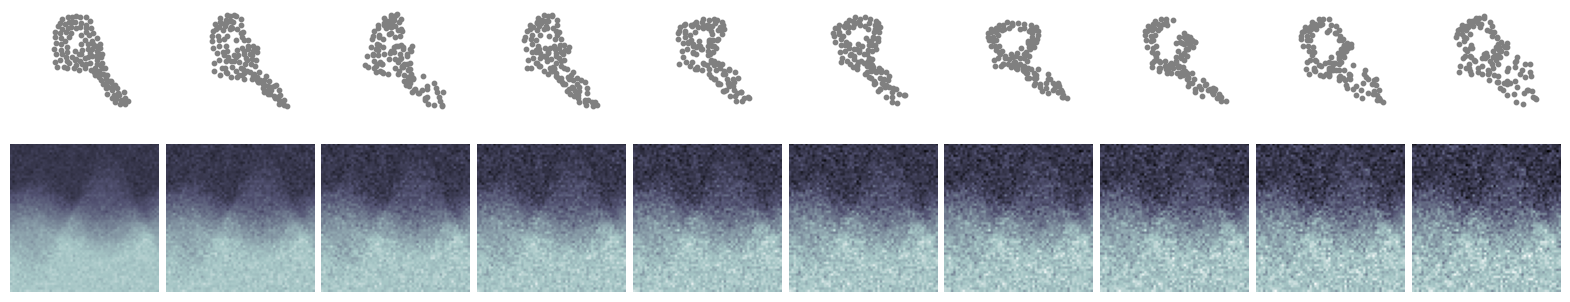

In [9]:
NOISE_TYPE = "gaussian"
DATASET_NAME = "mnist"
vis_ect = torch.load(f"./results/noise_{NOISE_TYPE}_vis_ect.pt")
vis_x = torch.load(f"./results/noise_{NOISE_TYPE}_vis_x.pt")

for i in vis_ect.keys():
    fig,axes=plt.subplots(2,10, figsize=(20,4))
    fig.subplots_adjust(wspace=0.05,hspace=0.05)

    for ect,x,axis in zip(vis_ect[i],vis_x[i],axes.T):
        x = x.view(128,2).cpu().numpy()
        x = rotate(x, degrees=-90)
        ax = axis[0]
        ax.scatter(x[:,0],x[:,1],**PC_PLOT_CONFIG)
        ax.set_xlim([-1.1,1.1])
        ax.set_xlim([-1.1,1.1])
        ax.axis("off")
        ax.set_aspect(1)
        
        ax = axis[1]
        ax.imshow(ect.squeeze().cpu().numpy(),**ECT_PLOT_CONFIG)
        ax.axis("off")
        
    plt.savefig(f"./figures/img/mnist/stability_{NOISE_TYPE}_{i}",
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0)